# Part I - Ford GoBike System Data Exploration
## by Zion Oluwasegun

## Introduction

This [dataset](https://www.google.com/url?q=https://www.fordgobike.com/system-data&sa=D&ust=1554484977399000) includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This document explores the dataset.



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

# For the geopy Library
pip install geopy
from geopy import distance


%matplotlib inline

In [2]:
#  Load dataset into pandas dataframe, df. Print statstics.
df = pd.read_csv('201902-fordgobike-tripdata.csv')

###  Assessing the data

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
sorted(df.member_birth_year.unique())

[1984.0,
 nan,
 1878.0,
 1900.0,
 1901.0,
 1902.0,
 1910.0,
 1920.0,
 1927.0,
 1928.0,
 1930.0,
 1931.0,
 1933.0,
 1934.0,
 1938.0,
 1939.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0]

### Quality Issues
1. Null values in start_station_id, start_station_name, end_station_id and end_station_name columns.
2. Illogical member_birth_year values between 1878.0 and 1938.0
3. Erroneous datatype for start_time, end_time, start_station_id, end_station_id, bike_id, member_birth_year.

### Tidiness Issues 
4. There should be start & end time, day and month columns.
5. There should be members age for easy interpretatin of member_birth_year.
6. duration_sec should be in hours.
7. Trip distance column should be calculated.
8. Longitude and latitude of locations should be merged into one column.

### Cleaning Data

In [10]:
df_copy = df.copy()

####  Issue #1:
Null values in start_station_id, start_station_name, end_station_id and end_station_name columns.

##### Define:
Drop null values in the affected columns with .dropna()

##### Code:

In [11]:
def drop_null_values(column):
    '''Drops null values in passed columns'''
    df_copy.dropna(subset=column, inplace=True)

aff_col = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name']
for a in aff_col:
    drop_null_values(a)

In [12]:
df_copy.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

# Issue #2:
Illogical member_birth_year values between 1878.0 and 1938.0 and nan values

##### Define:
- Replace 1878.0 with 1978.0
- Drop other values under 1938.0
- Replace nan with Na then drop null values.

##### Code:

In [13]:
# Replace 1878.0 with 1978.0
df_copy.member_birth_year.replace(1878.0, 1978.0, inplace=True)

# Drop other values under 1938.0 i.e users aged above 80
# df_copy = df_copy[df_copy['member_birth_year'] > 1938.0]

# Replace nan and drop null values
df_copy.member_birth_year.replace('nan', np.nan, inplace=True)
df_copy.dropna(subset='member_birth_year', inplace = True)

##### Test:

In [14]:
df_copy.member_birth_year.describe()

count    174952.000000
mean       1984.803706
std          10.115522
min        1900.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [15]:
df_copy.shape

(174952, 16)

#### Issue #3:
Erroneous datatype for start_time, end_time, start_station_id, end_station_id, bike_id, member_birth_year.

##### Define:
Convert the data types to their correct formats.

##### Code:

In [16]:
#  For IDs and year
df_copy['start_station_id'] = df_copy.start_station_id.astype('str')
df_copy['end_station_id'] = df_copy.end_station_id.astype('str')
df_copy['bike_id'] = df_copy.bike_id.astype('str')
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype('int')

#  For date and time
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

##### Test:

In [17]:
df_copy.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Issue #4:
There should be start & end time, day and month columns

##### Define:
- Extract month and day from start_time and end_time columns
- Convert the columns to ordered categorical columns

##### Code:

In [18]:
# For hours
df_copy['start_time_hour']=df_copy['start_time'].dt.hour
df_copy['end_time_hour']=df_copy['end_time'].dt.hour

#  For days
df_copy['start_day'] = df_copy['start_time'].dt.day_name()
df_copy['end_day'] = df_copy['end_time'].dt.day_name()

# For dates in month
df_copy['start_time_month_date']=df_copy['start_time'].map(lambda d: d.strftime('%m-%d'))
df_copy['end_time_month_date']=df_copy['end_time'].map(lambda d: d.strftime('%m-%d'))

# For months
df_copy['start_month'] = df_copy['start_time'].dt.month_name()
df_copy['end_month'] = df_copy['end_time'].dt.month_name()

In [19]:
# Order the Days and Months.
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

df_copy['start_month'] = df_copy['start_month'].astype(CategoricalDtype(categories = months, ordered = True))
df_copy['end_month'] = df_copy['end_month'].astype(CategoricalDtype(categories = months, ordered = True))

df_copy['start_day'] = df_copy['start_day'].astype(CategoricalDtype(categories = days, ordered = True))
df_copy['end_day'] = df_copy['end_day'].astype(CategoricalDtype(categories = days, ordered = True))

##### Test:

In [20]:
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### Issue #5:
There should be members age for easy interpretation of member_birth_year.

##### Define:
Subtract member_birth_year from 2019 (the year of data collection)

##### Code:

In [21]:
df_copy['member_age'] = 2019 - df_copy.member_birth_year
df_copy['member_age'] = df_copy['member_age'].astype('int')

##### Test:

In [22]:
df_copy[['member_age', 'member_birth_year']].head(2)

,member_age,member_birth_year
0,35,1984
2,47,1972


#### Issue #6:
duration_sec should be in hours.

##### Define:
Make a new column duration_hour by dividing duration_sec by 3600 ***[60 seconds * 60 minutes]***

##### Code:

In [23]:
df_copy['duration_hour'] = df_copy['duration_sec'] / 3600
df_copy['duration_hour'] = round(df_copy['duration_hour'],2)

##### Test:

In [24]:
df_copy[['duration_hour', 'duration_sec']].head(2)

,duration_hour,duration_sec
0,14.50,52185
2,17.18,61854


#### Issue #7:
Trip distance column should be calculated.

##### Define:
Calculate trip distance betweet start and end points using geopy.distance

##### Code:

In [25]:
def distance_calc(df_copy):
    ''' Calculates distance between coordinates'''
    
    start_coordinate = (df_copy['start_station_latitude'], df_copy['start_station_longitude'])
    end_coordinate = (df_copy['end_station_latitude'], df_copy['end_station_longitude'])
    return distance.distance(start_coordinate, end_coordinate).km

# Create distance column
df_copy['station_distance_km'] = df_copy.apply(distance_calc, axis=1)

##### Test:

In [26]:
df_copy['station_distance_km'].head(2)

0    0.543983
2    2.705390
Name: station_distance_km, dtype: float64

#### Issue #8:
Longitude and latitude of locations should be merged into one column.

##### Define:

Make a new column having longitude and latitude in a tuple.

##### Code:

In [27]:
# Merge columns together
df_copy['start_location'] = df_copy[['start_station_latitude', 'start_station_longitude']].apply(tuple, axis=1)
df_copy['end_location'] = df_copy[['end_station_latitude', 'end_station_longitude']].apply(tuple, axis=1)

#  Drop former columns
df_copy.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
             axis = 1, inplace=True)

##### Test:

In [28]:
df_copy[['start_location', 'end_location', 'station_distance_km']].head(2)

,start_location,end_location,station_distance_km
0,"(37.7896254, -122.400811)","(37.794231, -122.402923)",0.543983
2,"(37.7693053, -122.4268256)","(37.78637526861584, -122.40490436553954)",2.705390


---

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int32         
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  start_time_hour 

In [30]:
df_copy.describe()

,duration_sec,member_birth_year,start_time_hour,end_time_hour,member_age,duration_hour,station_distance_km
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803706,13.456165,13.609533,34.196294,0.195563,1.689939
std,1642.204905,10.115522,4.734282,4.748029,10.115522,0.456184,1.096526
min,61.000000,1900.000000,0.000000,0.000000,18.000000,0.020000,0.000000
25%,323.000000,1980.000000,9.000000,9.000000,27.000000,0.090000,0.909710
50%,510.000000,1987.000000,14.000000,14.000000,32.000000,0.140000,1.428159
75%,789.000000,1992.000000,17.000000,18.000000,39.000000,0.220000,2.224675
max,84548.000000,2001.000000,23.000000,23.000000,119.000000,23.490000,69.465977


In [31]:
df_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_time_hour            0
end_time_hour              0
start_day                  0
end_day                    0
start_time_month_date      0
end_time_month_date        0
start_month                0
end_month                  0
member_age                 0
duration_hour              0
station_distance_km        0
start_location             0
end_location               0
dtype: int64

In [32]:
df_copy.duplicated().sum()

0

In [33]:
df_copy.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,...,end_day,start_time_month_date,end_time_month_date,start_month,end_month,member_age,duration_hour,station_distance_km,start_location,end_location
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,...,Friday,02-28,03-01,February,March,35,14.50,0.543983,"(37.7896254, -122.400811)","(37.794231, -122.402923)"
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,...,Friday,02-28,03-01,February,March,47,17.18,2.705390,"(37.7693053, -122.4268256)","(37.78637526861584, -122.40490436553954)"
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,...,Friday,02-28,03-01,February,March,30,10.14,0.260896,"(37.77483629413345, -122.44654566049576)","(37.77331087889723, -122.44429260492323)"
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,...,Friday,02-28,03-01,February,March,45,0.44,2.412017,"(37.8045623549303, -122.27173805236816)","(37.7927143, -122.2487796)"
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,...,Friday,02-28,03-01,February,March,60,0.50,3.328256,"(37.7704074, -122.3911984)","(37.79801364395978, -122.40595042705534)"
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983,...,Friday,02-28,03-01,February,March,36,0.32,2.029323,"(37.3172979, -121.884995)","(37.329732, -121.901782)"
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989,...,Friday,02-28,03-01,February,March,30,0.45,4.526203,"(37.79539293725452, -122.4047702550888)","(37.7567083, -122.421025)"
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988,...,Friday,02-28,03-01,February,March,31,0.44,4.526203,"(37.79539293725452, -122.4047702550888)","(37.7567083, -122.421025)"
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,121.0,Mission Playground,6488,Subscriber,1992,...,Friday,02-28,03-01,February,March,27,0.29,3.660261,"(37.788975, -122.403452)","(37.7592103, -122.4213392)"
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,43.0,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,1996,...,Friday,02-28,03-01,February,March,23,0.13,0.978273,"(37.7873267660624, -122.41327822208405)","(37.7787677, -122.4159292)"


---
### What is the structure of your dataset?

There are 174952 records of bike trips covering the greater San Francisco Bay area for Febuary 2019. Of the 25 variables, 16 are categorical, while 8 are numerical

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the period and how often bikes are rented in the City.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Time and duration of rent.
- Age group and gender of users.
- Origin and Destination stations of trips.

## Univariate Exploration

In [34]:
# Set plotting style
sns.set_theme(style = 'darkgrid')
sns.set_context("paper")
base_colour = sns.color_palette()[-1]

#### What is the gender, subscription type and bike sharing behaviour distribution of the users?

In [35]:
def prop_(x):
    
    '''To calculate proportions of values in a column.
    x will be df.col or df['col']'''
    
    max_var_count = x.value_counts()[0]
    var_sum = x.value_counts().sum()
    max_prop = max_var_count/var_sum
    tick_props = np.arange(0,max_prop+0.05, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    
    return [tick_props, tick_names, var_sum]

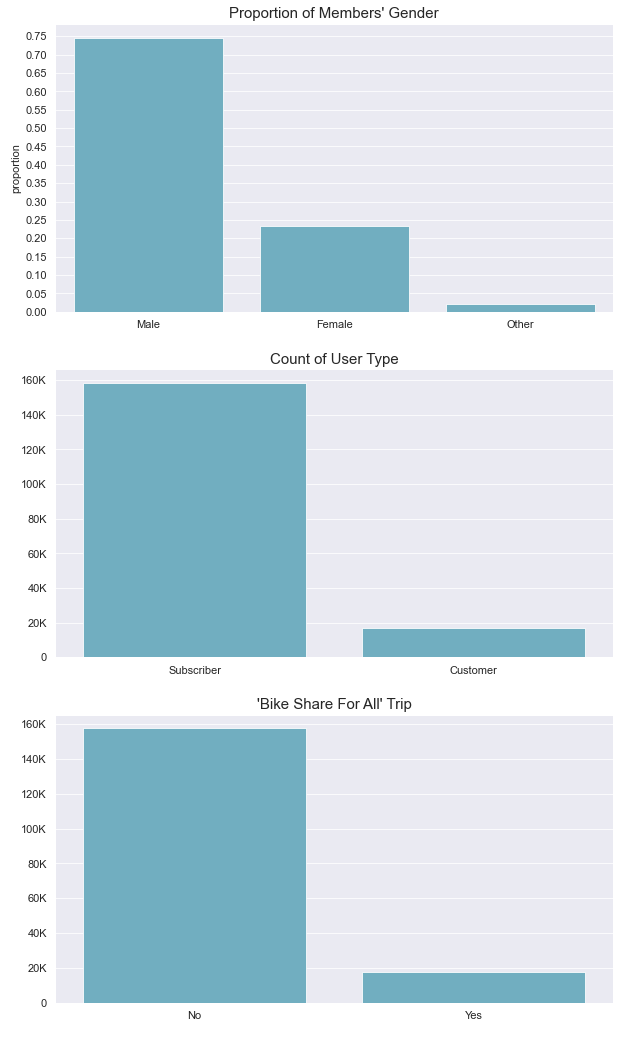

In [36]:
plt.figure(figsize=(10,18));

plt.subplot(3,1,1);
tick_props, tick_names, var_sum = prop_(df_copy.member_gender)
sns.countplot(data = df_copy, x = 'member_gender', order= ['Male', 'Female', 'Other'], color = base_colour)
plt.xticks(fontsize=11);
plt.yticks(tick_props * var_sum, tick_names, fontsize=11)
plt.ylabel('proportion',fontsize=11);
plt.xlabel(' ');
plt.title('Proportion of Members\' Gender', fontsize=15);

plt.subplot(3,1,2);
sns.countplot(data = df_copy, x = 'user_type', order = ['Subscriber', 'Customer'],color = base_colour)
plt.xticks(fontsize=11);
plt.yticks(np.arange(0,160000+10000,20000), ['0','20K','40K', '60K','80K','100K', '120K', '140K', '160K'],fontsize=11)
plt.ylabel(' ',fontsize=11);
plt.xlabel(' ');
plt.title('Count of User Type', fontsize=15);

plt.subplot(3,1,3);
sns.countplot(data = df_copy, x = 'bike_share_for_all_trip', color = base_colour)
plt.xticks(fontsize=11);
plt.yticks(np.arange(0,160000+10000,20000), ['0','20K','40K', '60K','80K','100K', '120K', '140K', '160K'],fontsize=11)
plt.ylabel(' ',fontsize=11);
plt.xlabel(' ');
plt.title('\'Bike Share For All\' Trip', fontsize=15);

The population of males is more than 3 times that of females in the data. Hoewver, there seem to be a perfect positive correlation between User type and Trip type. This is because only customers CAN have 'Bike Share For All' trips. One interesting to take a look at how both user types take trips

#### How is age distributed in the dataset?

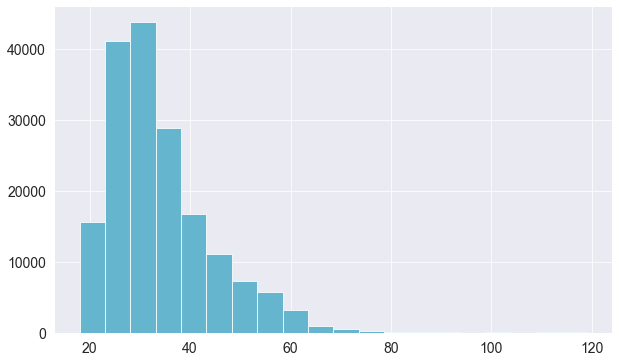

In [37]:
plt.figure(figsize=(10,6))
plt.hist(df_copy.member_age, color = base_colour, bins = 20);
plt.yticks(fontsize=14)
plt.xticks(fontsize=14);

The age distribution is highly skewed to the right. It has a long tail which consists of outliers as they have inconspicuous bar heights. A box plot will give a better visualization of the distribution.

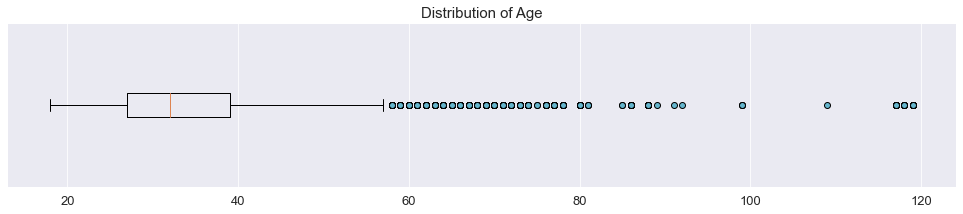

In [38]:
plt.figure(figsize=(17,3))
dots = dict(markerfacecolor=base_colour, marker='o')
plt.boxplot(df_copy.member_age, vert=False, flierprops = dots);
plt.yticks([],[]);
plt.xticks(fontsize=13)
plt.title('Distribution of Age', fontsize=15);

As stated earlier, there are outliers in the age. It is not common that cyclists are aged above 80 years, so we'll filter members aged 80 and above out of the dataset, then replot the histogram with a log scaled x-axis.

In [39]:
# Drop other values under 1938.0 i.e users aged above 80
df_copy = df_copy[df_copy['member_birth_year'] > 1938.0]

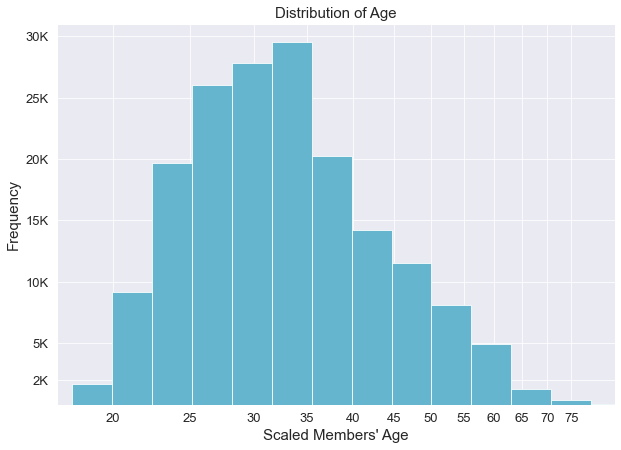

In [40]:
plt.figure(figsize=(10,7))
plt.title('Distribution of Age', fontsize=15);

# Get log value of maximum age
log_max = np.log10(df_copy.member_age.max())
bins=10**np.arange(1,log_max+0.2,0.05)

plt.hist(df_copy.member_age, color = base_colour, bins = bins);
plt.xscale('log')
plt.xticks(np.arange(20,80,5),np.arange(20,80,5), fontsize=13);
plt.xlim(17,85);
plt.xlabel('Scaled Members\' Age', fontsize=15);
plt.ylabel('Frequency', fontsize = 15);
plt.yticks([2000, 5000, 10000,15000,20000,25000,30000],['2K', '5K','10K','15K', '20K', '25K', '30K'], fontsize=13);

Majority of the users are, expectedly, youths with the modal age bracket being 30 and 35. By placing the age in age brackets (bins), we can check the proportion the age brackets.


In [41]:
bins= [10,20,30,40,50,60,70,80]
labels = ['10-20','20-30','30-40','40-50','50-60', '60-70','70-80']
df_copy['member_age_group'] = pd.cut(df_copy['member_age'], bins=bins, labels=labels, right=False)

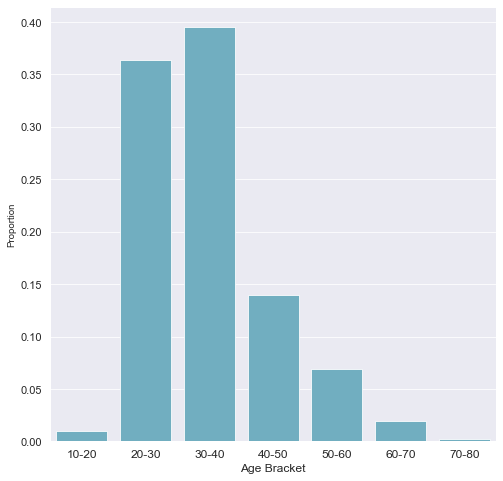

In [42]:
plt.figure(figsize=(8,8))

tick_props, tick_names, var_sum = prop_(df_copy.member_age_group)
sns.countplot(data=df_copy, x ='member_age_group', color=base_colour);
plt.ylabel('Proportion')
plt.xlabel('Age Bracket', fontsize=12)
plt.yticks(tick_props * var_sum, tick_names, fontsize=11);
plt.xticks(fontsize=12);

#### At what hour do users start and end their trip the most?

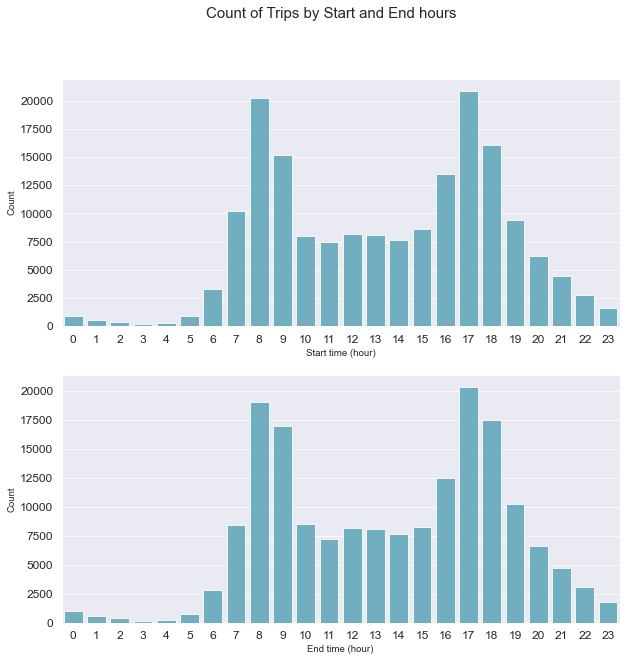

In [43]:
plt.figure(figsize = [10,10])
plt.suptitle('Count of Trips by Start and End hours', fontsize=15)

# For the top plot
plt.subplot(2,1,1)
sns.countplot(data = df_copy, x = 'start_time_hour', color=base_colour);
plt.xlabel('Start time (hour)');
plt.ylabel('Count');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# For the bottom plot
plt.subplot(2,1,2)
sns.countplot(data = df_copy, x = 'end_time_hour', color=base_colour);
plt.xlabel('End time (hour)');
plt.ylabel('Count');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

The distribuion of rental and return time of the day is fairly bimodal. Users tend to rent/return bikes around 8am and 5pm. This indicates that many users use bikes to and from their place of work or school.

#### On what days do users use bikes the most?

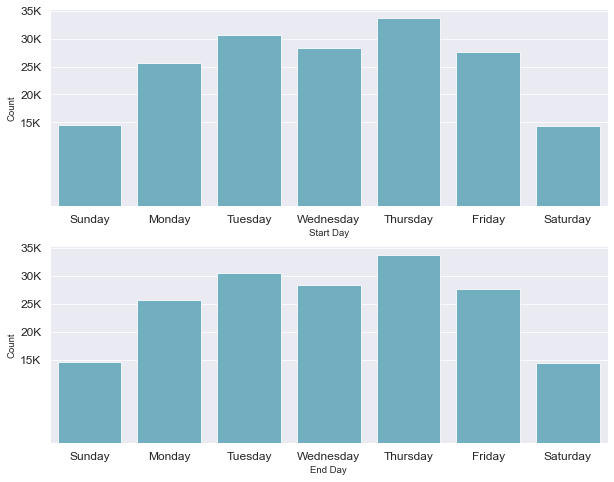

In [44]:
plt.figure(figsize = [10,8])

# For the top plot
plt.subplot(2,1,1)
sns.countplot(data = df_copy, x = 'start_day', color = base_colour)
plt.yticks([15000,20000,25000,30000,35000],['15K', '20K', '25K', '30K','35K']);
plt.xlabel('Start Day');
plt.ylabel('Count');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# For the bottom plot
plt.subplot(2,1,2)
sns.countplot(data = df_copy, x = 'end_day', color = base_colour)
plt.yticks([15000,20000,25000,30000,35000],['15K', '20K', '25K', '30K','35K']);
plt.xlabel('End Day');
plt.ylabel('Count');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

There seem to be a gradual increase from Monday to Thursday, but with a drop for Wednesday. Weekends are expectedly low, as people hardly go out to work, school etc during the weekends. To investigate the dates further, we need to check the spread of trips across the month.

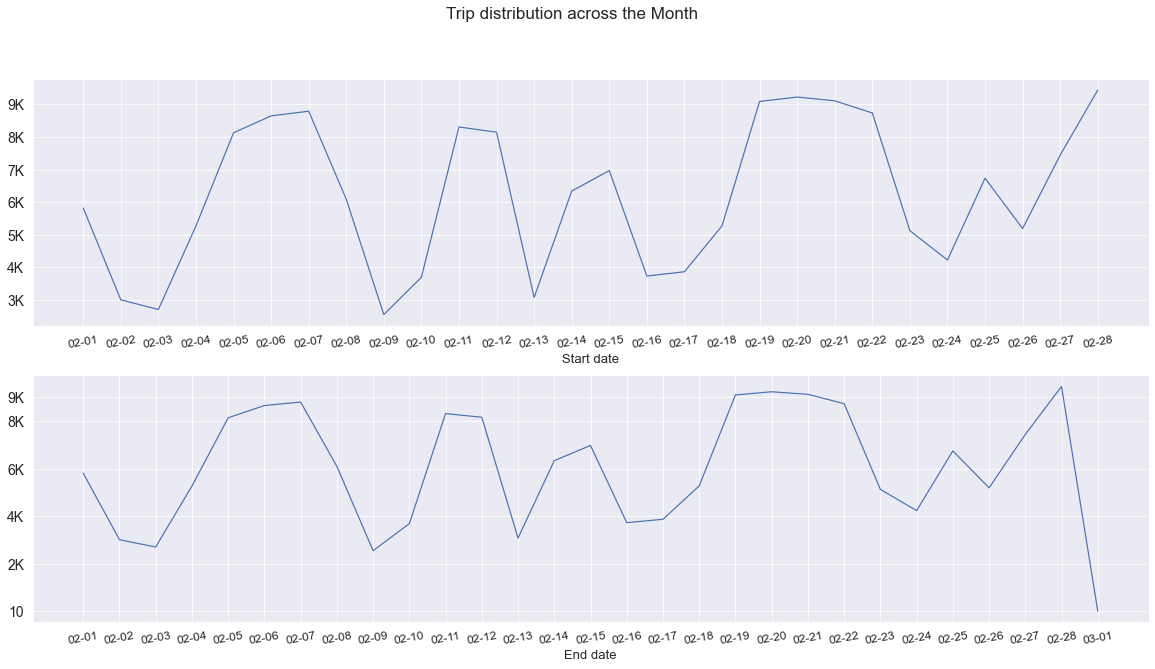

In [45]:
plt.figure(figsize=[20,10])
plt.suptitle('Trip distribution across the Month', fontsize=17);

# For top plot
plt.subplot(2,1,1)
freq = df_copy.start_time_month_date.value_counts().sort_index()
plt.plot(freq.index, freq)
plt.yticks([3000,4000,5000,6000,7000,8000,9000],['3K', '4K','5K','6K','7K', '8K','9K'], fontsize=14)
plt.xticks(rotation=10, fontsize=12);
plt.xlabel('Start date', fontsize=13)

# For bottom plot
plt.subplot(2,1,2)
freq = df_copy.end_time_month_date.value_counts().sort_index()
plt.plot(freq.index, freq)
plt.yticks([10,2000,4000,6000,8000,9000],['10','2K', '4K','6K', '8K', '9K'], fontsize=14)
plt.xticks(rotation=10, fontsize=12);
plt.xlabel('End date', fontsize=13);

This spread reinforces the fact that Users hardly make rent/return bike during weekends. However, there's an exception for Wednesday, February 13. This is most probably because of the [flooding that happened](https://www.cbsnews.com/sanfrancisco/news/powerful-atmospheric-river-roars-into-bay-area-mudslides-flooding-torrential-downpours/) that morning. This is also the case for [Febuary 24](https://www.mercurynews.com/2019/02/25/atmospheric-river-storm-arrives-in-the-bay-area/#:~:text=Just%20ahead%20of%20an%20%E2%80%9Catmospheric%20river%E2%80%9D%20storm%20that%20is%20expected%20to%20soak%20the%20Bay%20Area%20with%20as%20much%20as%206%20to%208%20inches%20of%20rain%20through%20Wednesday%2C%20light%20precipitation%20began%20falling%20Monday%20morning%20north%20of%20the%20Golden%20Gate%20with%20much%20heavier%20downpours%20expected%20later%20in%20the%20day%20and%20through%20Wednesday.).

For the dropped tail of March 1, it is for the spill over 14 returns to the new month.

#### How far do users go for their trips?

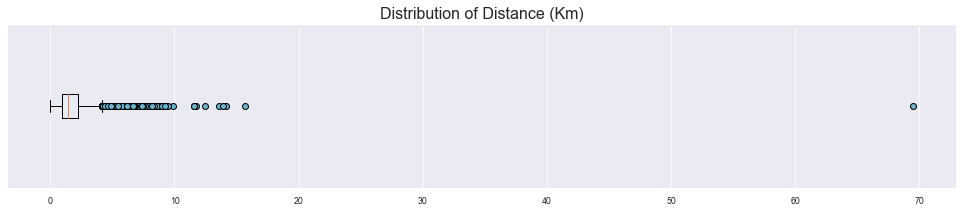

In [46]:
plt.figure(figsize=(17,3))
dots = dict(markerfacecolor=base_colour, marker='o')
plt.boxplot(df_copy.station_distance_km, vert=False, flierprops = dots);
plt.yticks([],[]);
plt.title('Distribution of Distance (Km)', fontsize=16);

There's one outlier in the disance covered. It needs to be filtered out of the dataset

In [47]:
# A new dataframe which doesn't contain the outlier
df_copy_normal_dist = df_copy[df_copy.station_distance_km < 60]

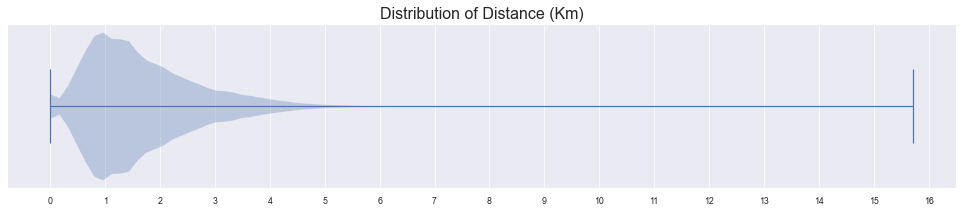

In [48]:
plt.figure(figsize=(17,3))
dots = dict(markerfacecolor=base_colour, marker='o')
plt.violinplot(df_copy_normal_dist.station_distance_km, vert=False);
plt.yticks([],[]);
plt.xticks(np.arange(0,17,1), np.arange(0,17,1))
plt.title('Distribution of Distance (Km)', fontsize=16);

Most users take trips of about 1 kilometer

#### What are the most used stations?

In [49]:
# Filter top 10 used stations for start and end trips
top_start_vc = df_copy.start_station_name.value_counts().head(10)
end_start_vc = df_copy.end_station_name.value_counts().head(10)

# Create dataframe of most used stations
top_start = df_copy[df_copy['start_station_name'].isin(top_start_vc.index)]
top_end = df_copy[df_copy['end_station_name'].isin(end_start_vc.index)]

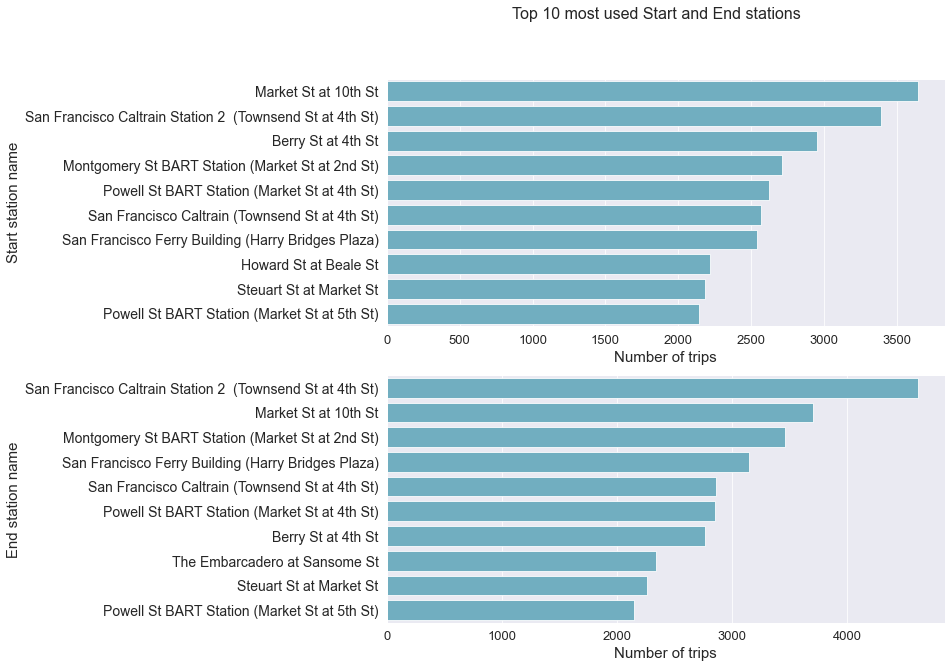

In [50]:
plt.figure(figsize=(10,10))
plt.suptitle('Top 10 most used Start and End stations', fontsize=16 );

# For plot on top
plt.subplot(2,1,1)
sns.countplot(data=top_start, y='start_station_name', color=base_colour, order= top_start_vc.index);
plt.ylabel('Start station name', fontsize=15)
plt.xlabel('Number of trips', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)

# For plot at the bottom
plt.subplot(2,1,2)
sns.countplot(data=top_end, y='end_station_name', color=base_colour, order= end_start_vc.index);
plt.ylabel('End station name', fontsize=15)
plt.xlabel('Number of trips', fontsize=15);
plt.yticks(fontsize=14)
plt.xticks(fontsize=13);

Most of the stations are located around Market St. This suggests that Market Street is a place full of activities.

## Bivariate Exploration

#### How often do users take trips in the month?

In [51]:
user_type_by_month = df_copy.groupby(['start_time_month_date','user_type']).size().reset_index()

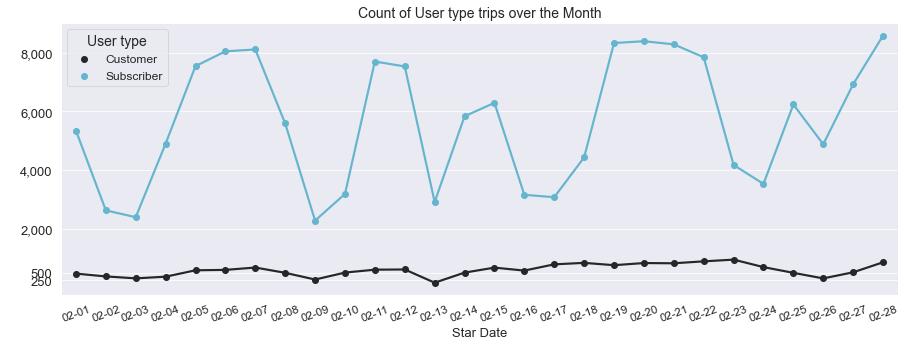

In [52]:
plt.figure(figsize=(15,5))
sns.pointplot(data = user_type_by_month, x='start_time_month_date', y=0, hue='user_type', color=base_colour);
plt.yticks([250, 500, 2000,4000,6000,8000],['250', '500','2,000', '4,000', '6,000', '8,000'], fontsize=13);
plt.ylabel(' ');
plt.xticks(rotation=20,fontsize=11.5);
plt.xlabel('Star Date', fontsize=13)
plt.legend(title='User type',title_fontsize=14, fontsize=12, loc=2);
plt.title('Count of User type trips over the Month', fontsize=14);

Customers took bikes fairly everyday. On the day of the first flood, February 13, the customer trend had it's lowest record. It seems the amount of subscribers took a sharp increase towards the end of the month, but this can't be taken as face value becasue the month started on a Friday, a day before the weekend.

#### What is the average distance taken by age group?

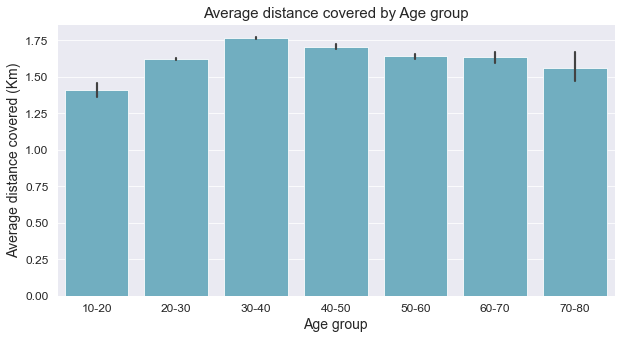

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(data = df_copy, x=df_copy.member_age_group, y=df_copy.station_distance_km,color=base_colour);
plt.title('Average distance covered by Age group', fontsize=15);
plt.xlabel('Age group', fontsize=14);
plt.ylabel('Average distance covered (Km)', fontsize=14);
plt.yticks(fontsize=12);
plt.xticks(fontsize=12);

#### What is the average distance taken by User type?

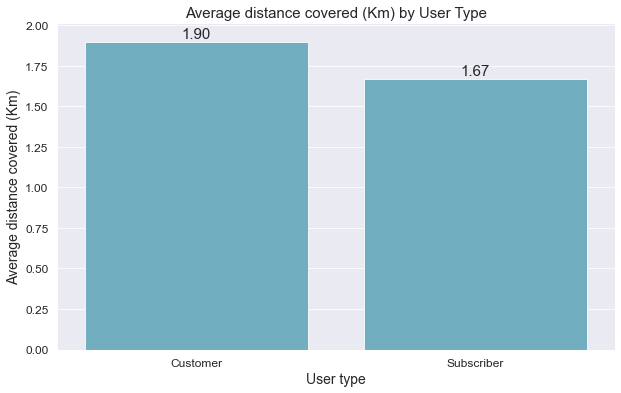

In [54]:
plt.figure(figsize=(10,6))


# Using the dataset without the outlier
p = sns.barplot(data = df_copy_normal_dist, x=df_copy_normal_dist.user_type, y=df_copy_normal_dist.station_distance_km,
                color=base_colour, errwidth=0);
plt.title('Average distance covered (Km) by User Type', fontsize=15);
plt.xlabel('User type', fontsize=14);
plt.ylabel('Average distance covered (Km)', fontsize=14);
plt.yticks(fontsize=12);
plt.xticks(fontsize=12);

# For annotation
for bar in p.patches:
    p.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

Surprisingly, They cover roughly equal distance averagely with less than 0.5 Kilometers for difference. As we saw during the univariate exploration, there seem to be something interesting about User types and if bike trips are shared. Now lets dive deeper.

In [55]:
# Create new datafrme of user type and trip share type
trip_type_df = df_copy.groupby(['bike_share_for_all_trip','user_type']).size().reset_index()

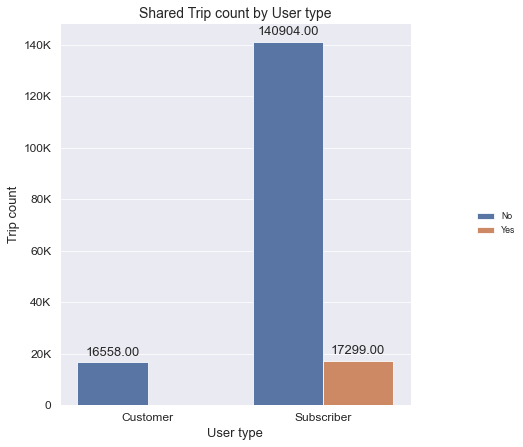

In [56]:
g = sns.catplot(data=trip_type_df, kind="bar", x="user_type", y=0, hue="bike_share_for_all_trip",
                height=6)
g.legend.set_title("")
plt.xticks(fontsize=12)
plt.yticks(np.arange(0,160000,20000),['0','20K', '40K', '60K', '80K', '100K', '120K', '140K'], fontsize=12)
plt.xlabel('User type', fontsize = 13)
plt.ylabel("Trip count", fontsize=13)
plt.title('Shared Trip count by User type', fontsize=14)
# For annotation
for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13)

This shows that all customers did not share their bike trips, While almost similar population of the customers that are subcribers shared their trips.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### What's the trip distance by age group and User type?

C:\Users\Zion\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


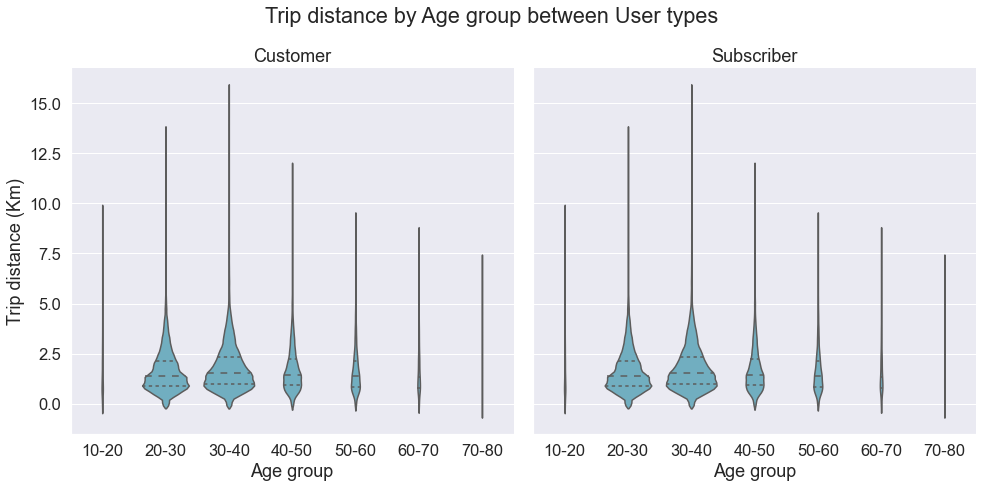

In [57]:
sns.set(font_scale=1.5)
g=sns.FacetGrid(data = df_copy_normal_dist, col = 'user_type', height=7)
g.map(sns.violinplot, x=df_copy_normal_dist.member_age_group, y=df_copy_normal_dist.station_distance_km,
            color=base_colour, inner ='quartile', scale='count');
g.set_axis_labels("Age group", "Trip distance (Km)")
g.set_titles('{col_name}');
g.fig.subplots_adjust(top=0.859)
g.fig.suptitle('Trip distance by Age group between User types');

Across User types, the age groups travel fairly the same distance for trips, with age brackets 0-40 having more users and longer trips.

#### What's the average duration and distance of trips by Gender, User type and Age group?

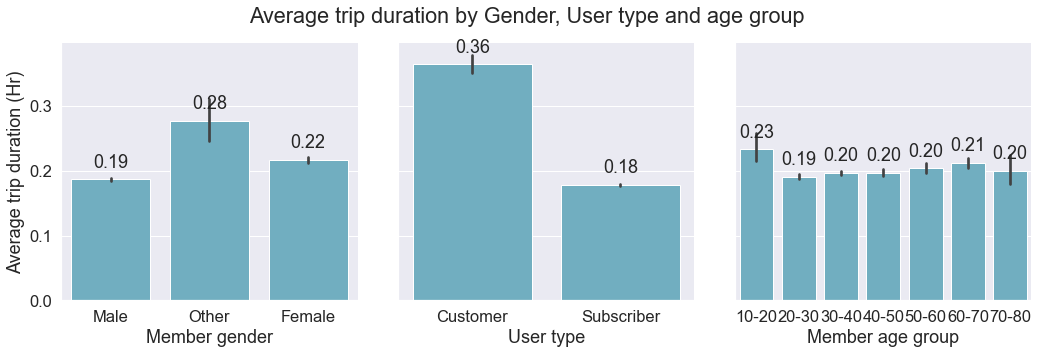

In [58]:
g = sns.PairGrid(df_copy, y_vars="duration_hour",
                 x_vars=["member_gender", "user_type", "member_age_group"],
                 height=5)
g.map(sns.barplot, color=base_colour)
g.fig.suptitle('Average trip duration by Gender, User type and age group')
g.fig.subplots_adjust(top=0.88)
g.axes[0,0].yaxis.set_label_text('Average trip duration (Hr)')
g.axes[0,0].xaxis.set_label_text('Member gender')
g.axes[0,1].xaxis.set_label_text('User type')
g.axes[0,2].xaxis.set_label_text('Member age group')

# For annotations
for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 17), textcoords = 'offset points')

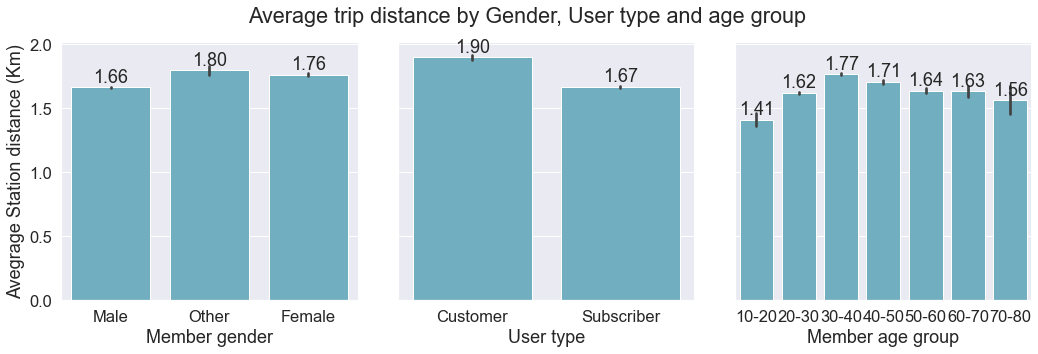

In [59]:
g = sns.PairGrid(df_copy_normal_dist, y_vars="station_distance_km",
                 x_vars=["member_gender", "user_type", "member_age_group"],
                 height=5)

g.map(sns.barplot, color=base_colour);
g.fig.suptitle('Average trip distance by Gender, User type and age group')
g.fig.subplots_adjust(top=0.88)
g.axes[0,0].yaxis.set_label_text('Avegrage Station distance (Km)')
g.axes[0,0].xaxis.set_label_text('Member gender')
g.axes[0,1].xaxis.set_label_text('User type')
g.axes[0,2].xaxis.set_label_text('Member age group')

# For annotations
for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Considering the fact that members with their gender as 'other', they take the longes trips with respect to time and distance. Also, Customers tend to take longer trips than Subscribers. 

## Conclusions

- A large amount of the Users are Males, and Subscribers.

- Most Users are aged between 20-40. witha modal age bracket of 30-31

- The most used Stations are located around Market Street. [This street](https://en.wikipedia.org/wiki/Market_Street_(San_Francisco)) is a hub of activities in San Francisco.

- Peak time for rides are around office time, 8AM in the mornin, and close time, 5PM in the evening. with reduced trips during weekends.

- As sharing trips is an option for users, only few subscribers do share trips. No customer does that.

- On average, Customers spend more hours on trips compared to Subscribers (which amounts for about 80% of the trips)

- Female users spend more time on trips and also take longer trips compared to Males.

In [ ]:
# Save cleaned data set for later use
df_copy.to_csv('cleaned_bike_data.csv',index=False)